# Hand Gesture Recogntion using CNN (Accuracy 98%)

<a id="Section 1:Import Necessary Libraries:"></a>
# Import Necessary Libraries

In [5]:
import os
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import matplotlib.pyplot as plt #for different plot
from sklearn.preprocessing import OneHotEncoder #for data preprocessing
from sklearn.preprocessing import StandardScaler #for scaling data
from sklearn.model_selection import train_test_split
#for data preprocessing using keras
from tensorflow.keras.preprocessing.image import array_to_img, img_to_array, load_img
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator
# keras classes required for building deep CNN model
from keras.models import Sequential, save_model, load_model
from keras.layers import Dense, Conv2D, MaxPooling2D, Flatten, Activation, Dropout 
from keras.utils import plot_model
import plotly.express as px
from plotly.subplots import make_subplots
import plotly.graph_objects as go
import plotly.figure_factory as ff




<a id="Section 1:read dataset including folders, subfolders, and images :"></a>
# Read Images and Labels in the Dataset  



In [16]:
images=[]
labels=[]

# oop over top 10 folders
for directory in os.listdir(r'C:\Users\Subhodh Bijjur\Downloads\archive (5)\leapGestRecog'):
    for subdir in os.listdir(os.path.join(r'C:\Users\Subhodh Bijjur\Downloads\archive (5)\leapGestRecog',directory)):
#         if directory=='01':
#             labels.append(subdir)
        for image in os.listdir(os.path.join(r'C:\Users\Subhodh Bijjur\Downloads\archive (5)\leapGestRecog',directory, subdir)):
            img_path = os.path.join(r'C:\Users\Subhodh Bijjur\Downloads\archive (5)\leapGestRecog', directory, subdir, image)
            images.append(img_path)
            labels.append(subdir)

        
# print(labels)

<a id="Section 1:Create DataFrame for Images&Labels:"></a>
# Read Images and Labels in the Dataset  

In [17]:
#include both image path and labels into dataframe
df = pd.DataFrame({'Image':images,'Label':labels})
df.tail()
# df.info()


,Image,Label
20095,C:\Users\Subhodh Bijjur\Downloads\archive (5)\...,09
20096,C:\Users\Subhodh Bijjur\Downloads\archive (5)\...,09
20097,C:\Users\Subhodh Bijjur\Downloads\archive (5)\...,09
20098,C:\Users\Subhodh Bijjur\Downloads\archive (5)\...,09
20099,C:\Users\Subhodh Bijjur\Downloads\archive (5)\...,09


<a id="Section 1:Randomly Display some labeled images from the dataset:"></a>
# Randomly Display some labeled images from the dataset 

[[<Axes: > <Axes: > <Axes: > <Axes: > <Axes: >]
 [<Axes: > <Axes: > <Axes: > <Axes: > <Axes: >]]


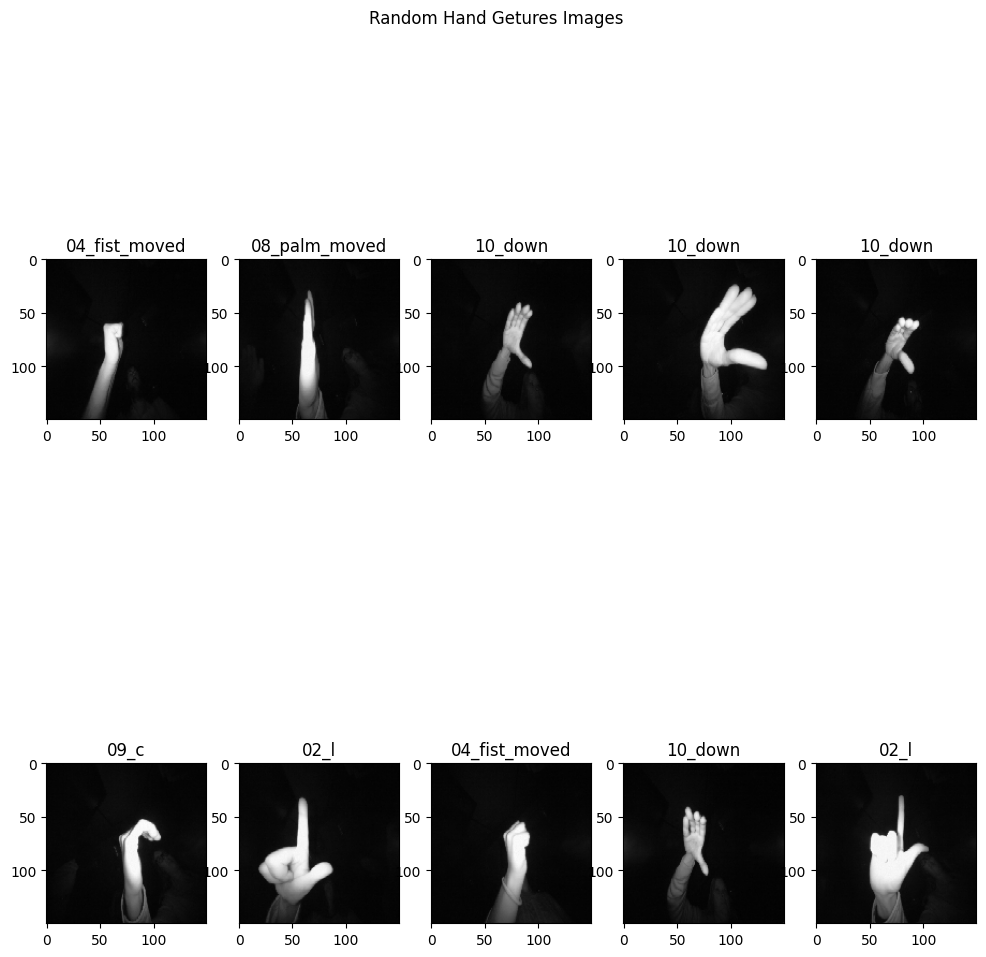

In [18]:

df_img = df['Image']
df_label = df['Label']

nrows=2
ncols = 5
fig,axx = plt.subplots(nrows,ncols, figsize=(12,12))
fig.suptitle("Random Hand Getures Images")
print(axx)
# axx = axx.ravel()
for i in range(nrows):
        for j in range(ncols):
                n = np.random.randint(0,20000)
                img = load_img(df['Image'][n],target_size=(150,150)) #this is a PIL image
                img = img_to_array(img) #this is a numpy array with shape (3,150,150)
                img = np.expand_dims(img,axis=0) #expand image dimention to (1,3,255,255)
                img /= 255.0 #scale image values between 0,1
                label = df_label[n]
                #changing size from (1,150,150,3) into (150,150,3)
                image = np.squeeze(img)
                axx[i][j].imshow(image)
                axx[i][j].set_title(label)
plt.show()
plt.close()


<a id="Split Dataset into 80% for training 15%,15% for validation and testing:"></a>
# Split Dataset into 70% for training 15%,15% for validation and testing

In [19]:
x_train,x = train_test_split(df, test_size = 0.3)
# train_x, test_x, train_y, test_y = train_test_split(images,labels,test_size=0.2)
x_valid,x_test = train_test_split(x,test_size=0.5)
x_train.info()
x_valid.info()
x_test.info()


<class 'pandas.core.frame.DataFrame'>
Index: 14070 entries, 17041 to 5419
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   Image   14070 non-null  object
 1   Label   14070 non-null  object
dtypes: object(2)
memory usage: 329.8+ KB
<class 'pandas.core.frame.DataFrame'>
Index: 3015 entries, 9035 to 5145
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   Image   3015 non-null   object
 1   Label   3015 non-null   object
dtypes: object(2)
memory usage: 70.7+ KB
<class 'pandas.core.frame.DataFrame'>
Index: 3015 entries, 14186 to 327
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   Image   3015 non-null   object
 1   Label   3015 non-null   object
dtypes: object(2)
memory usage: 70.7+ KB


<a id="Data Augmentation:"></a>
# Data Augmentation 

In [20]:
#data augmentation
datagen = ImageDataGenerator(
        rotation_range=10, # rotation
        width_shift_range=0.2, # horizontal shift
        height_shift_range=0.2, # vertical shift
        zoom_range=0.2, # zoom
        horizontal_flip=True, # horizontal flip
        brightness_range=[0.2,1.2]) # brightness


train_datagen = ImageDataGenerator(rescale=1.0/255,
                                 shear_range=0.2,
                                 zoom_range=0.2,
                                 horizontal_flip=True)
validate_datagen = ImageDataGenerator(rescale=1.0/255)

In [21]:
b_size =1
train_generator = train_datagen.flow_from_dataframe(dataframe=x_train,x_col="Image",y_col='Label',class_mode="categorical",target_size=(150,150),batch_size=b_size,seed=2020, shuffle=True)
valid_generator = validate_datagen.flow_from_dataframe(dataframe=x_valid,x_col="Image",y_col='Label',class_mode="categorical",target_size=(150,150),batch_size=b_size,seed=2020, shuffle=False)


Found 13994 validated image filenames belonging to 10 classes.


c:\Users\Subhodh Bijjur\anaconda3\envs\tfgpu\lib\site-packages\keras\preprocessing\image.py:1139: UserWarning: Found 76 invalid image filename(s) in x_col="Image". These filename(s) will be ignored.
  warnings.warn(


Found 3000 validated image filenames belonging to 10 classes.


c:\Users\Subhodh Bijjur\anaconda3\envs\tfgpu\lib\site-packages\keras\preprocessing\image.py:1139: UserWarning: Found 15 invalid image filename(s) in x_col="Image". These filename(s) will be ignored.
  warnings.warn(


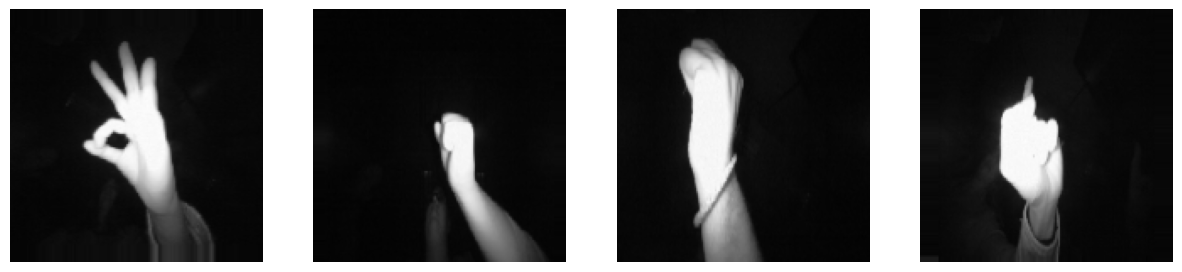

In [22]:
#plot some augmented images
fig,axx = plt.subplots(nrows=1,ncols=4, figsize=(15,15))

for i in range(4):
    #convert into unsigned integers for plotting
    image = next(train_generator)[0].astype('float64')
    #changing size from (1,150,150,3) into (150,150,3)
    image = np.squeeze(image)
    #plot row pixel data
    axx[i].imshow(image)
    axx[i].axis('off')



In [23]:
# #[3]:

# images list & labels list
# images = []
# labels = []

# image = df['Image']
# img = load_img(image[i],target_size=(150,150)) #this is a PIL image

# for i in range(len(df)):
#     img = load_img(image[i])
#     x = img_to_array(img) #this is a numpy array with shape (3,150,150)
# #     x = np.expand_dims(x,axis=0) #expand image dimention to (1,3,255,255)
# #     x /= 255.0 #scale image values between 0,1
#     images.append(x)
#     label = df_label[i]
#     labels.append(label)

    


<a id="Build Convolutional Neural Network Model (CNN):"></a>
# Build Convolutional Neural Network Model (CNN)

In [24]:
#Build Convolutional Neural Network Model (CNN)¶

#3 Cov2D layers with Relu activation functions followed by max-pooling layers that ouput 3D feature maps 
model = Sequential()
model.add(Conv2D(32,(3,3), input_shape=(150,150,3)))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2,2)))

model.add(Conv2D(32,(3,3)))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2,2)))

model.add(Conv2D(64,(3,3)))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2,2)))

# on top of the model we add 2 fully connected layers to flatten the 3D feature maps into 10 feature victors representing 10 differnet categories of hanf geatures
model.add(Flatten())
model.add(Dense(64))
model.add(Activation('relu'))
model.add(Dropout(0.2))
model.add(Dense(10))
model.add(Activation('softmax'))

model.compile(loss=tf.keras.losses.CategoricalCrossentropy(from_logits=False),
             optimizer = 'adam',
             metrics=[tf.keras.metrics.CategoricalAccuracy()])
model.summary()


Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 148, 148, 32)      896       
                                                                 
 activation (Activation)     (None, 148, 148, 32)      0         
                                                                 
 max_pooling2d (MaxPooling2D  (None, 74, 74, 32)       0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 72, 72, 32)        9248      
                                                                 
 activation_1 (Activation)   (None, 72, 72, 32)        0         
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 36, 36, 32)       0         
 2D)                                                    

<a id="Visualize Model:"></a>
# Visualize Model

In [25]:
# Visualize model
plot_model(
    model,
    to_file="model.png",
    show_shapes=True,
    show_dtype=True,
    show_layer_names=True 
)


You must install pydot (`pip install pydot`) and install graphviz (see instructions at https://graphviz.gitlab.io/download/) for plot_model to work.


<a id="Train and save Model:"></a>
# Train and save Model

In [26]:
#train Test data in the model
history = model.fit(train_generator,
                   steps_per_epoch=2000//b_size,
                   epochs = 20,
                   validation_data = valid_generator,
                    validation_steps=800//b_size)
                   
model.save('handG_R.h5')

Epoch 1/20
2000/2000 [==============================] - 27s 8ms/step - loss: 1.3546 - categorical_accuracy: 0.5665 - val_loss: 0.3989 - val_categorical_accuracy: 0.9125
Epoch 2/20
2000/2000 [==============================] - 15s 8ms/step - loss: 0.5222 - categorical_accuracy: 0.8320 - val_loss: 0.1440 - val_categorical_accuracy: 0.9600
Epoch 3/20
2000/2000 [==============================] - 15s 7ms/step - loss: 0.3126 - categorical_accuracy: 0.8955 - val_loss: 0.1011 - val_categorical_accuracy: 0.9688
Epoch 4/20
2000/2000 [==============================] - 14s 7ms/step - loss: 0.2476 - categorical_accuracy: 0.9230 - val_loss: 0.0395 - val_categorical_accuracy: 0.9875
Epoch 5/20
2000/2000 [==============================] - 13s 7ms/step - loss: 0.2043 - categorical_accuracy: 0.9450 - val_loss: 0.0614 - val_categorical_accuracy: 0.9837
Epoch 6/20
2000/2000 [==============================] - 14s 7ms/step - loss: 0.1623 - categorical_accuracy: 0.9430 - val_loss: 0.0424 - val_categorical_acc

In [27]:
# display loss & accuracy 
history.history

{'loss': [1.3545520305633545,
  0.5222012996673584,
  0.3125830888748169,
  0.24764227867126465,
  0.2042759358882904,
  0.1623004972934723,
  0.1723509430885315,
  0.11807873845100403,
  0.10612780600786209,
  0.1175619438290596,
  0.09901601821184158,
  0.08856022357940674,
  0.09165941923856735,
  0.11553322523832321,
  0.06665574014186859,
  0.08156415820121765,
  0.07493849843740463,
  0.05767710506916046,
  0.07682734727859497,
  0.07212647050619125],
 'categorical_accuracy': [0.5665000081062317,
  0.8320000171661377,
  0.8955000042915344,
  0.9229999780654907,
  0.9449999928474426,
  0.9430000185966492,
  0.9545000195503235,
  0.9635000228881836,
  0.9649999737739563,
  0.965499997138977,
  0.968999981880188,
  0.9725000262260437,
  0.9739999771118164,
  0.9614999890327454,
  0.9810000061988831,
  0.9775000214576721,
  0.9775000214576721,
  0.9779999852180481,
  0.9804999828338623,
  0.9764999747276306],
 'val_loss': [0.39889347553253174,
  0.14403995871543884,
  0.1010740473866

<a id="Visualize training&validation loss:"></a>
# Visualize training&validation loss

In [39]:
#visualize training loss & validation loss which indecates there is no overfitting
fig = go.Figure()
epochs = 20
fig.add_trace(go.Scatter(x=np.arange(0,epochs,1),
y=history.history['loss'],
mode='lines',
name=f'training loss',
marker_size=3,
line_color='blue'))
fig.add_trace(go.Scatter(x=np.arange(0, epochs, 1),
                         y=history.history['val_loss'],
                         mode='lines',
                         name=f'Validation loss',
                         line_color='grey'))
fig.update_layout(
                  title="CNN training loss",
                  xaxis_title="Epochs",
                  yaxis_title=f"CategoricalCrossentropy")
                  
fig.update_layout({'plot_bgcolor': '#f2f8fd' , 
                   'paper_bgcolor': 'white',}, 
                   template='plotly_white')

ValueError: Mime type rendering requires nbformat>=4.2.0 but it is not installed

Figure({
    'data': [{'line': {'color': 'blue'},
              'marker': {'size': 3},
              'mode': 'lines',
              'name': 'training loss',
              'type': 'scatter',
              'x': array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16, 17,
                          18, 19]),
              'y': [1.3545520305633545, 0.5222012996673584, 0.3125830888748169,
                    0.24764227867126465, 0.2042759358882904, 0.1623004972934723,
                    0.1723509430885315, 0.11807873845100403, 0.10612780600786209,
                    0.1175619438290596, 0.09901601821184158, 0.08856022357940674,
                    0.09165941923856735, 0.11553322523832321, 0.06665574014186859,
                    0.08156415820121765, 0.07493849843740463, 0.05767710506916046,
                    0.07682734727859497, 0.07212647050619125]},
             {'line': {'color': 'grey'},
              'mode': 'lines',
              'name': 'Validation loss',
              'type': 'scatter',
              'x': array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16, 17,
                          18, 19]),
              'y': [0.39889347553253174, 0.14403995871543884, 0.10107404738664627,
                    0.039489634335041046, 0.06142793223261833, 0.042385533452034,
                    0.04828087240457535, 0.03793125972151756, 0.02292218618094921,
                    0.013486235402524471, 0.019224215298891068,
                    0.01827661506831646, 0.004848589189350605, 0.02128925547003746,
                    0.008802641183137894, 0.01925022341310978,
                    0.040382008999586105, 0.012575783766806126,
                    0.023486247286200523, 0.0021037207916378975]}],
    'layout': {'paper_bgcolor': 'white',
               'plot_bgcolor': '#f2f8fd',
               'template': '...',
               'title': {'text': 'CNN training loss'},
               'xaxis': {'title': {'text': 'Epochs'}},
               'yaxis': {'title': {'text': 'CategoricalCrossentropy'}}}
})

In [44]:
clear_output

NameError: name 'clear_output' is not defined

<a id="Visualize training&validation accuracy:"></a>
# Visualize training&validation accuracy

In [40]:
#visualize training accuracy & validation accuracy
fig = go.Figure()
epochs = 20
fig.add_trace(go.Scatter(x=np.arange(0,epochs,1),
y=history.history['categorical_accuracy'],
mode='lines',
name=f'training accuracy',
marker_size=3,
line_color='blue'))
fig.add_trace(go.Scatter(x=np.arange(0, epochs, 1),
                         y=history.history['val_categorical_accuracy'],
                         mode='lines',
                         name=f'Validation accuracy',
                         line_color='grey'))
fig.update_layout(
                  title="CNN training accuracy",
                  xaxis_title="Epochs",
                  yaxis_title=f"CategoricalCrossentropy")
                  
fig.update_layout({'plot_bgcolor': '#f2f8fd' , 
                   'paper_bgcolor': 'white',}, 
                   template='plotly_white')

ValueError: Mime type rendering requires nbformat>=4.2.0 but it is not installed

Figure({
    'data': [{'line': {'color': 'blue'},
              'marker': {'size': 3},
              'mode': 'lines',
              'name': 'training accuracy',
              'type': 'scatter',
              'x': array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16, 17,
                          18, 19]),
              'y': [0.5665000081062317, 0.8320000171661377, 0.8955000042915344,
                    0.9229999780654907, 0.9449999928474426, 0.9430000185966492,
                    0.9545000195503235, 0.9635000228881836, 0.9649999737739563,
                    0.965499997138977, 0.968999981880188, 0.9725000262260437,
                    0.9739999771118164, 0.9614999890327454, 0.9810000061988831,
                    0.9775000214576721, 0.9775000214576721, 0.9779999852180481,
                    0.9804999828338623, 0.9764999747276306]},
             {'line': {'color': 'grey'},
              'mode': 'lines',
              'name': 'Validation accuracy',
              'type': 'scatter',
              'x': array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16, 17,
                          18, 19]),
              'y': [0.9125000238418579, 0.9599999785423279, 0.96875,
                    0.987500011920929, 0.9837499856948853, 0.9887499809265137,
                    0.9887499809265137, 0.9900000095367432, 0.9925000071525574,
                    0.9962499737739563, 0.9950000047683716, 0.9950000047683716,
                    0.9975000023841858, 0.9937499761581421, 0.9950000047683716,
                    0.9925000071525574, 0.9887499809265137, 0.9962499737739563,
                    0.9937499761581421, 1.0]}],
    'layout': {'paper_bgcolor': 'white',
               'plot_bgcolor': '#f2f8fd',
               'template': '...',
               'title': {'text': 'CNN training accuracy'},
               'xaxis': {'title': {'text': 'Epochs'}},
               'yaxis': {'title': {'text': 'CategoricalCrossentropy'}}}
})

<a id="Train Model:"></a>
# Test Model to new data

In [34]:
x_test.info()
x_test.tail(20)
samples= x_test.sample(n=5)


<class 'pandas.core.frame.DataFrame'>
Index: 3015 entries, 14186 to 327
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   Image   3015 non-null   object
 1   Label   3015 non-null   object
dtypes: object(2)
memory usage: 70.7+ KB


In [35]:
model = load_model('./handG_R.h5',compile=True)
